# Lección 2.3: Sistemas de varios qubits

En esta lección consideraremos sistemas de 2 o más qubits. Introduciremos el formalismo del operador densidad para describir el estado de un qubit particular de un registro cuántico cuando este último se encuentra en un estado entrelazado. Aprenderemos a generar entrelazamiento por medio de la compuerta CNOT. Posteriormente, introduciremos el famoso teorema de no clonación, y sus implicaciones para la computación. Finalmente, veremos un ejemplo práctico sobre el uso de estados entrelazados y el formalismo de la matriz densidad para construir un **duplicador universal**, siguiendo el trabajo de Buzek y Hillery.

**SUPER IMPORTANTE:** En este ejemplo intentaremos presentar al lector el formalismo necesario para estudiar la computación cuántica en forma teórica, así como una posible intuición física sobre la misma. Esta sesióne stá disponible en nuestro servidor de MyBinder.

<p align="center">
  <a href="https://mybinder.org/v2/gh/QC-FEM/QC-CrashCourse/HEAD">
    <img src="https://mybinder.org/badge_logo.svg">
  </a>
</p>

In [11]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, BasicAer, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram
backend = Aer.get_backend('statevector_simulator')

## Estados de varios qubits

Como vimos en lecciones anteriores, podremos describir un sistema cuántico compuesto empleando el **producto tensorial o de Kroenecker**. Este nos permitirá definir una *base* para los estados de un sistema compuesto. Por ejemplo, un registro de $N$ qubits, puede descrbirse en términos de la *base computacional*

$$|q_{N-1} \ldots q_2q_1q_0\rangle = |q_{N-1}\rangle \otimes \ldots \otimes |q_2\rangle \otimes |q_1\rangle \otimes |q_0\rangle$$

Donde $q_i = 0,1$. Es importante notar que la base computacional de un registro de $N$ qubits es numerable. De hecho, si interpretamos la secuencia de valores $q_i$ como una cadena binaria, esta no es más que la representación en sistema binario de un número entre $0$ y $2^{N}-1$. Por ejemplo, si consideramos un registro de 3 qubits, entonces podremos establecer las siguientes equivalencias

$$|1\rangle \otimes |0\rangle \otimes |1\rangle = |101\rangle = |9\rangle$$

En lenguaje matricial, la base computacional corresponde a la base estándar de un espacio vectorial complejo de dimensión $2^{N}$. Siguiendo con el ejemplo anterior, es posible realizar la equivalencia

$$|k\rangle = \begin{bmatrix}0 \\ \vdots \\ 1 \\ \vdots \\ 0\end{bmatrix} \rightarrow \text{ en la }k\text{-ésima posición}$$

Para $0 \leq k \leq 2^{N}-1$. 

>El estado general de un registro cuántico de $N$ qubits puede representarse como una combinación lineal de los estados de la base computacional
>
>$$|\psi\rangle = \sum_{k = 0}^{2^{N}-1}\alpha_k |k\rangle$$

Los coeficientes de la expansión pueden tener una interpretación probabilística. En el caso de estados de un qubit, recordemos, estos presentaban información sobre la probabilidad de medir un valor de bit $0$ o $1$. Para un registro cuántico, estos dan información sobre la probabilidad de medir una cadena binaria particular, representable con $N$ bits. 

>Es decir, si se define $p(k|\psi)$ como la probabilidad de medir una cadena binaria que representa el entero $k$, dado que el registro está en un estado cuántico $|\psi\rangle$, entonces
>
>$$p(k|\psi) = |\alpha_k|^2$$

## Compuertas de varios qubits

Al considerar la computación reversible vimos varias compuertas que actúan sobre 2 o 3 qubits. En su momento, presentamos la acción sobre cualquier cadena binaria particular. La generalización a la computación cuántica se produce por medio de la definición de operadores lineales que tienen el mismo efecto que las compuertas reversibles consideradas sobre la base computacional. Por ejemplo, consideremos la compuerta CNOT. EN computación cuántica, esta serñá representada por un *operador lineal*, que denotaremos con $CNOT$. Como vimos en su momento, esta compuerta se define por

$$CNOT |00\rangle = |00\rangle$$

$$CNOT |01\rangle = |01\rangle$$

$$CNOT |10\rangle = |11\rangle$$

$$CNOT |11\rangle = |10\rangle$$

Donde asumimos que el bit menos significativo es el objetivo, y el más significativo, el de control. Podremos entonces representar la compuerta CNOT por medio de una matriz. Invitamos al lector a convencerse que esta es

$$CNOT = \begin{bmatrix}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{bmatrix}$$

Invitamos al lector a encontrar la representación matricial de la compuerta CNOT cuando el bit objetivo es el más significativo y el menos significativo, el de control. Para ello deberá considerar la acción de esta como un operador sobre la base computacional.

## Estados independientes y estados entrelazados

Consideremos un registro cuántico de 2 qubits, inicializado en el estado $|00\rangle$. Vamos a realizar dos tipos de operaciones sobre este. En un primer lugar, vamos a aplicar una rotación de un qubit sobre cada qubit del registro. Estas corresponderán a las conocidas compuertas de Hadmard y Pauli X. Posteriormente, vamos a realizar una rotación de un qubit (compuerta Hadamard) sobre alguno de los qubits del registro; luego aplicaremos una compuerta CNOT utilizando el qubit rotado como control. Vamos a comparar ambas situaciones en términos de probabilidades condicionales. Definiremos la siguiente notación: diremos que $p(q_i = a)$ denota la probabilidad que $q_i$ tenga un valor de bit $a$; mientras que $p(q_i = a | q_j = b)$ denota la probabilidad que $q_i$ tenga un valor de bit $a$, dado que fue medido que $q_j$ tiene un valor de bit $b$.

### Circuito independiente

Vamos a considerar la primera situación. Con qiskit vamos a encontrar la probabilidad de que el bit $q_1$ tenga valor 1, dado que se mide un valor particular de $q_0$. Vamos a definir el circuito base

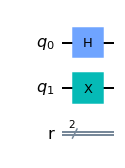

In [35]:
## Creamos registro cuántico
q = QuantumRegister(2,name='q')
## Creamos registro de medición
r = ClassicalRegister(2,name='r')
QC_indep = QuantumCircuit(q,r)
## Aplicamos Hadmard Sobre q0
QC_indep.h(q[0])
## Aplicamos X sobre q1
QC_indep.x(q[1])
## Dibujamos el circuito
QC_indep.draw(output='mpl')

Vamos a establecer $p(q_0 = 0)$. Para ello, vamos a simular el circuito, y guardar solo la medición del bit $q_0$

In [36]:
qasm_sim = BasicAer.get_backend('qasm_simulator')
QC_indep.measure(q[0],r[0])
counts = execute(QC_indep,qasm_sim,shots=1<<15).result().get_counts()
print(counts)

{'01': 16468, '00': 16300}


Notamos inmediatamente que $p(q_0 = 0) = 0.5$. Igualmente, $p(q_0 = 1) = 0$. En forma análoga, podemos determinar que $p(q_1 = 0) = 0$, $p(q_1 = 1) = 1$. Ahora podremos determinar las probabilidades $p(q_0 = a \bigcap q_1 = b)$. Esto lo realizamos midiendo ambos valores de bit al tiempo

In [37]:
## Ejecutamos el circuito
qasm_sim = BasicAer.get_backend('qasm_simulator')
QC_indep.measure(q,r)
counts = execute(QC_indep,qasm_sim,shots=1<<15).result().get_counts()
print(counts)

{'11': 16446, '10': 16322}


Con el simulador notamos que $p(q_0 = 0 \bigcap q_1 = 1) = 0.5$ y $p(q_0 = 1 \bigcap q_1 = 1) = 0.5$. Con estos datos, invitamos al lector a convencerse de que

$$p(q_1 = 1 | q_0 = 0) = p(q_1 = 1 | q_0 = 1) = 1 = p(q_1 = 1)$$

$$p(q_1 = 0 | q_0 = 0) = p(q_1 = 0 | q_0 = 1) = 0 = p(q_1 = 0)$$

De igual forma si $q_0 = 1$. En esta situación observamos que no existe una correlación entre la medición del valor de bit de $q_0$, y aquella de $q_1$. Decimos que con este circuito hemos contruido un **estado separable o independiente**

> En un estado separable, no hay una correlación entre los observables de un subsistema u otro. Cada qubit de un registro cuántico descrito por un estado separable está descrito por una distribución de probabilidad independiente de los otros. Matemáticamente, un estado separable está descrito por medio de un **producto de Kroenecker**
>
> $$|\psi\rangle = |\psi_{N-1}\rangle \otimes \cdots \otimes |\psi_{2}\rangle \otimes |\psi_{1} \rangle \otimes |\psi_{0}\rangle$$

### Circuito entrelazado

Repetiremos el procedimiento anterior, pero esta vez utilizaremos una compuerta CNOT, en lugar de una compuerta X de Pauli. Definimos el circuito base

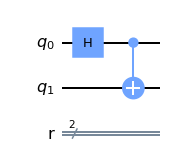

In [54]:
## Creamos registro cuántico
q = QuantumRegister(2,name='q')
## Creamos registro de medición
r = ClassicalRegister(2,name='r')
QC_ent = QuantumCircuit(q,r)
## Aplicamos Hadmard Sobre q0
QC_ent.h(q[0])
## Aplicamos X sobre q1
QC_ent.cx(*q)
## Dibujamos el circuito
QC_ent.draw(output='mpl')

Al igual que antes, calcularemos $p(q_0 = 0)$ y $p(q_1 = 1)$. Para ello solo mediremos el valor de bit de $q_0$

In [51]:
qasm_sim = BasicAer.get_backend('qasm_simulator')
QC_ent.measure(q[0],r[0])
counts = execute(QC_ent,qasm_sim,shots=1<<15).result().get_counts()
print(counts)

{'00': 16349, '11': 16419}


Igual que antes, identificamos que $p(q_0 = 0) = p(q_1 = 1) = 0.5$. De igual forma determinamos que $p(q_1 = 0) = p(q_1 = 1) = 0.5$. Ahora procedemos a calcular $p(q_0 = a \bigcap q_1 = b)$, midiendo el bit de ambos qubits al tiempo.

In [55]:
## Ejecutamos el circuito
qasm_sim = BasicAer.get_backend('qasm_simulator')
QC_ent.measure(q,r)
counts = execute(QC_ent,qasm_sim,shots=1<<15).result().get_counts()
print(counts)

{'00': 16455, '11': 16313}


Notamos inmediatamente que $p(q_1 = 1 \bigcap q_0 = 1) = p(q_1 = 0 \bigcap q_0 = 0) = 0.5$. En consecuencia, podremos advertir que

$$p(q_1 = 0 | q_0 = 0) = 1 \neq p(q_1 = 0)$$

$$p(q_1 = 1 | q_0 = 1) = 1 \neq p(q_1 = 1)$$

Es decir, existe una correlación entre las mediciones del valor de bit de ambos qubits. Notaremos que estas están **directamente correlacionadas**. Siempre que se mida un valor de bit en $q_0$, $q_1$ tendrá el mismo valor de bit. Esto no es un hecho extraño de la física clásica. De hecho, las interacciones entre sistemas, como aquella que es representada por la compuerta CNOT, tienden a construir correlaciones entre sistemas interactuantes. Sin embargo, sistemas cuánticos como el que acabamos de considerar en el circuito anterior tienen correlaciones mucho más altas que aquellas predichas por teorías basadas en los paradigmas de la física clásica. Esta propiedad, y otras que discutiremos en futuras lecciones, son una manifestación de una propiedad cuántica que denominaremos **entrelazamiento**

> Un estado entrelazado es aquel en el cual el vector de estado del registro cuántico no puede expresarse como un producto de Kroenecker de vectores de estado de los componentes individuales. Esto es una manera de decir que existen correlaciones entre las distintas cantidades medibles asociadas a cada qubit del mismo, y que son producto de su naturaleza cuántica.

### Descripción matemática

Vamos ahora a analizar este simple ejemplo utilizando el formalismo matemático de la mecánica cuántica. Para ello, recordemos que podremos describir la acción de dos compuertas que actúan sobre un qubit por medio del producto de Kroenecker. Supongamos que tenemos compuertas $\hat{U}_{N-1}$, $\hat{U}_{N-2}$, $\ldots$, $\hat{U}_0$, actuando sobre los qubits un registro, que se encuentra en un estado de la base computacional $|q_{N-1}\cdots q_0\rangle$. Cada compuerta actúa sobre un qubit solamente. Diremos entonces que la acción de este conjunto de compeurtas sobre el estado del registro es

$$(\hat{U}_{N-1} \otimes \hat{U}_{N-2} \otimes \cdots \otimes \hat{U}_{1} \otimes \hat{U}_{0}) |q_{N-1}\cdots q_0\rangle = |\psi_{N-1}\rangle \otimes |\psi_{N-2}\rangle \otimes \cdots \otimes |\psi_0\rangle$$

Donde realizamos la definición

$$|\psi_i\rangle = \hat{U}_{i}|q_i\rangle$$

#### Circuito independiente

Utilizando la notación anterior, podremos ver que el estado del registro de 2 qubits después de ejecutar el circuito es

$$|\psi_f\rangle = (\hat{X} \otimes \hat{H})|00\rangle$$

Invitamos al lector a demostrar que este corresponde a

$$|\psi_f\rangle = \frac{1}{\sqrt{2}}(|10\rangle + |11\rangle)$$

Notaremos que este es fácilmente factorizable como

$$|\psi_f\rangle = |1\rangle \otimes |+\rangle$$

Donde identificamos el estado $|+\rangle$ que conocimos en lecciones anteriores. Más adelante, cuando discutamos el tratamiento de la medición en mecánica cuántica, notaremos que en este estado los observables asociados únicamente al qubit 0, no guardan una correlación con aquellos del qubit 1. Esto se expresa matemáticamente en el hecho que puede expresarse como un producto de Kroenecker.

#### Circuito entrelazado

Utilizando la notación anterior, podremos ver que el estado del sistema antes de aplicar la compuerta CNOT es un estado producto

$$|\psi \rangle = |0\rangle \otimes |+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |01\rangle)$$

> La compuerta CNOT cuántica actúa como un operador lineal. Recordando que el control es el bit menos significativo, identificamos que el estado final del registro es
>
> $$|\psi_f\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$
>
> Invitamos al lector a demostrar que este es un estado **entrelazado**

La clave es la compuerta CNOT. Esta es fundamental para crear entrelazamiento en el estado de un registro. Existe una gran cantidad de compuertas de 2 qubits que pueden cumplir esta función. Sin embargo, CNOT tiene la propiedad de ser parte de un conjunto universal de compuertas para la computación cuántica. Ya que, en el momento de construcción de este curso, los dispositivos de IBM Q utilizan esta compuerta para transpilar algoritmos cuánticos digitales, no entraremos en detalles sobre las propiedades de otras compuertas entrelazantes, a menos que sea estrictamente necesario.

## Teorema de no clonación

Consideremos un problema sencillo pero fundamental de la computación: copiar el valor de una variable, en otra. En computación clásica reversible identificamos que la compuerta CNOT nos permite realizar esta tarea. De hecho, si trabajamos excvlusivamente con estados de la base computacional, obtenemos dos copias completamente independientes, que se encuentran en el mismo estado. Consideremos ahora la tarea de duplicar el estado de un qubit

$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$$

En otro qubit, preparado en un estado de referencia $|Q\rangle$. Supongamos que exista un circuito (representado como un operador unitario de 2 qubits $\hat{U}$) que pueda actuar sobre la base computacional, de forma que

$$\hat{U}|0\rangle \otimes |Q\rangle = |0\rangle \otimes |0\rangle$$

$$\hat{U}|1\rangle \otimes |Q\rangle = |1\rangle \otimes |1\rangle$$

Puesto que los operadores correspondientes a circuitos cuánticos **son lineales**, obtendremos que

$$\hat{U}|\psi\rangle \otimes |Q\rangle = \alpha |0\rangle \otimes |0\rangle + \beta |1\rangle \otimes |1\rangle$$

Invitamos al lector a demostrar que este es un estado completamente distinto a aquel que representa a los dos qubits con el mismo vector de estado, pero independientes:

$$|\psi\rangle \otimes |\psi\rangle = (\alpha |0\rangle + \beta|1\rangle) \otimes (\alpha |0\rangle + \beta|1\rangle)$$

> Sin encontramos un circuito capaz de duplicar dos estados independientes de un qubit, no podemos copiar otro estado arbitrario que no esté en esa base por medio del mismo circuito.

Esto es generalizable a estados de más qubits. Y es el contenido básico del denominado **teorema de no clonación**

> **Teorema de no clonación:** Es imposible encontrar una transformación unitaria que sea capaz de duplicar el estado de un sistema cuántico, en otro de idéntica naturaleza, de tal forma que el sisterma original y el clon sean completamente independientes, es decir, estén descritos por un estado separable.

In [9]:
## Parametros de la red de copiado
theta1 = np.arccos(1.0/np.sqrt(5))
theta2 = np.arccos(np.sqrt(5)/3)
theta3 = np.arccos(2/np.sqrt(5))

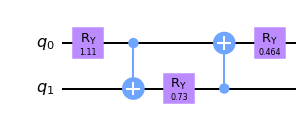

In [21]:
## Demostracion de la fase de preparacion
prep = QuantumCircuit(2)
## Aplicamos rotacion theta1
prep.ry(theta1,0)
## Aplicamos CNOT
prep.cx(0,1)
## Aplicamos rotacion theta2
prep.ry(theta2,1)
## Aplicamos CNOT
prep.cx(1,0)
## Aplicamos rotacion theta3
prep.ry(theta3,0)
## Dibujamos el circuito
prep.draw(output='mpl')

In [20]:
## Simulamos el estado final
PHI = execute(prep,backend).result().get_statevector()
## Imprimimos el resultado final
print(PHI)

[0.81649658+0.j 0.        +0.j 0.40824829+0.j 0.40824829+0.j]


In [28]:
paso_prep = prep.to_gate()
paso_prep.name = 'preparacion'

In [56]:
## Circuito de copiado
MaquinaCopiado = QuantumCircuit(3,1)

In [57]:
## Cagamos un estado inicial arbitrario
theta = np.pi/3.5
phi = np.pi/2.7
estado_a_copiar = np.array([
    np.cos(theta),
    np.exp(1j*np.pi)*np.sin(theta)
])
MaquinaCopiado.initialize(estado_a_copiar,0)

In [58]:
## Incluimos la fase de preparacion
MaquinaCopiado.append(paso_prep,[1,2])
## Colocamos una barrera por claridad
MaquinaCopiado.barrier()

In [59]:
## Incluimos la fase de copiado
MaquinaCopiado.cx(0,1)
MaquinaCopiado.cx(0,2)
MaquinaCopiado.cx(1,0)
MaquinaCopiado.cx(2,0)

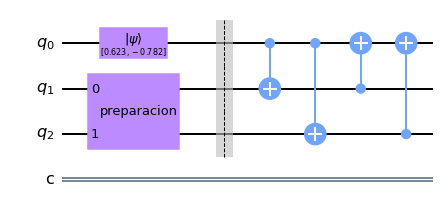

In [60]:
## Dibujamos circuito
MaquinaCopiado.draw(output='mpl')

In [61]:
from qiskit.aqua.utils import get_subsystem_density_matrix

In [62]:
## Ejecutamos y simulamos el circuito
estado_final_registro = execute(MaquinaCopiado,backend).result().get_statevector()
## Imprimimos matriz densidad reducida primer qubit
rho0 = get_subsystem_density_matrix(estado_final_registro,[1,2])
print(rho0)

[[ 0.42582636+0.00000000e+00j -0.32497597-3.97980782e-17j]
 [-0.32497597+3.97980782e-17j  0.57417364+0.00000000e+00j]]


In [63]:
## Imprimimos matriz densidad reducida segundo qubit
rho0 = get_subsystem_density_matrix(estado_final_registro,[0,2])
print(rho0)

[[ 0.42582636+0.00000000e+00j -0.32497597-3.97980782e-17j]
 [-0.32497597+3.97980782e-17j  0.57417364+0.00000000e+00j]]
